In [1]:
import pandas as pd


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("clean_contact_dataset.csv",encoding='latin', low_memory=False)

In [11]:
action_list=["Used_Federal_Services__c","Used_Volunteer_Services__c","Resume_Completed_By__c","Virtual_Workshop_Participant__c","On_Job_Board__c","Federal_Hire__c","Created_LinkedIn_account__c",
             "Hired_with_EO_assistance__c","Updated_Resume_Complete__c","HHUSA_Workshop_Participant__c","O2O_Initial_Assessment_Complete__c",
          "Is_the_Initial_Intake_Assessment_done__c","Permission_to_use_job_board_granted__c","Resume_Tailoring_Tips__c","Finalized_HHUSA_revised_resume_on_file__c","Hire_Heroes_USA_Confirmed_Hire__c","VCF_Participant__c","Interview_Skills__c","Value_Proposition__c"]

In [12]:
data=data[action_list]

In [14]:
confirmed_hire=data.loc[data["Hire_Heroes_USA_Confirmed_Hire__c"]==1]

In [15]:
confirmed_hire.shape

(23523, 19)

In [17]:
not_confirmed_hire=data.loc[data["Hire_Heroes_USA_Confirmed_Hire__c"]==0]

In [18]:
not_confirmed_hire.shape

(18224, 19)

In [38]:
def count_table(dataFrame,feature):
    dataset_by_feature = dataFrame.groupby(feature)
    countTable = dataset_by_feature[feature].agg(['count'])
    total_feature = countTable.values.sum()
    proportion = np.divide(countTable['count'], total_feature/100)
    countTable['%'] = proportion
    countTable = countTable.reset_index()
    return countTable.nlargest(25, 'count')
def summary(dataFrame,feature):
    plot = count_table(dataFrame,feature).plot(x = feature, y = '%', kind = 'bar')
    plt.show()
    return count_table(dataFrame,feature)

# Confirmed Hire

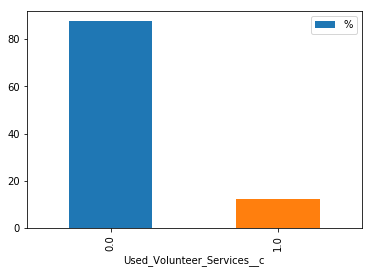

,Used_Volunteer_Services__c,count,%
0,0.0,20641,87.748161
1,1.0,2882,12.251839


In [39]:
summary(confirmed_hire,'Used_Volunteer_Services__c')

# Not confirmed Hire

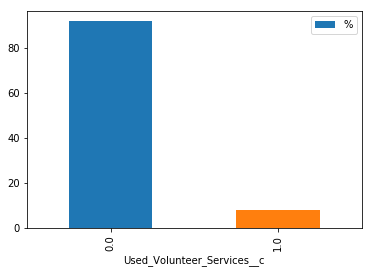

,Used_Volunteer_Services__c,count,%
0,0.0,16765,91.994074
1,1.0,1459,8.005926


In [40]:
summary(not_confirmed_hire,'Used_Volunteer_Services__c')

# VCF_Participant__c

# Confirmed Hire

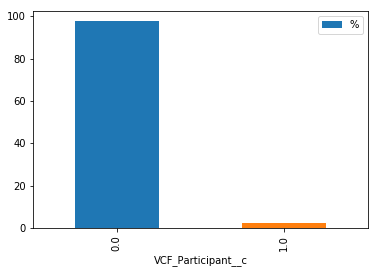

,VCF_Participant__c,count,%
0,0.0,23006,97.802151
1,1.0,517,2.197849


In [41]:
summary(confirmed_hire,'VCF_Participant__c')

# Not Confirmed Hire

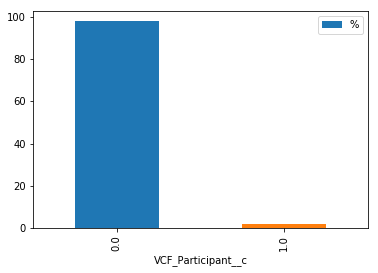

,VCF_Participant__c,count,%
0,0.0,17871,98.062994
1,1.0,353,1.937006


In [42]:
summary(not_confirmed_hire,'VCF_Participant__c')

# Virtual_Workshop_Participant__c

# Confirmed Hire

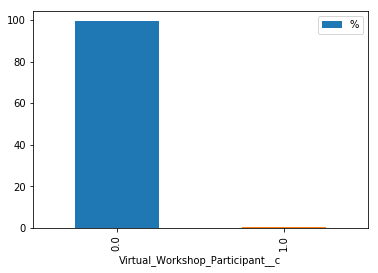

,Virtual_Workshop_Participant__c,count,%
0,0.0,23449,99.685414
1,1.0,74,0.314586


In [43]:
summary(confirmed_hire,'Virtual_Workshop_Participant__c')

# Not Confirmed Hire

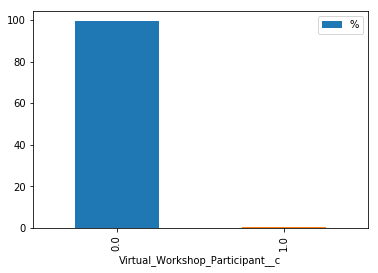

,Virtual_Workshop_Participant__c,count,%
0,0.0,18157,99.632353
1,1.0,67,0.367647


In [44]:
summary(not_confirmed_hire,'Virtual_Workshop_Participant__c')

# On_Job_Board__c

# Confirmed Hire

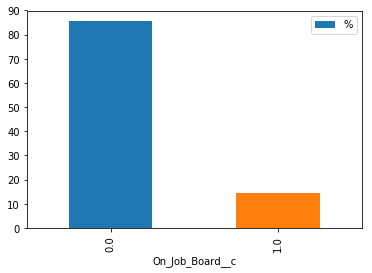

,On_Job_Board__c,count,%
0,0.0,20145,85.639587
1,1.0,3378,14.360413


In [45]:
summary(confirmed_hire,'On_Job_Board__c')

# Not Confirmed Hire

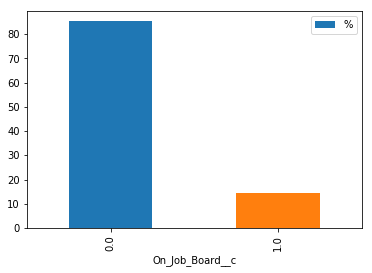

,On_Job_Board__c,count,%
0,0.0,15574,85.458736
1,1.0,2650,14.541264


In [46]:
summary(not_confirmed_hire,'On_Job_Board__c')

# Used_Federal_Services__c

#  Confirmed Hire

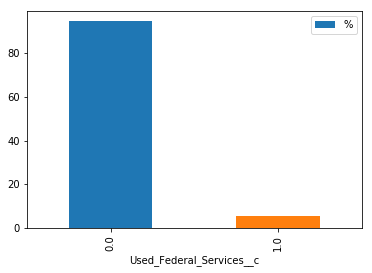

,Used_Federal_Services__c,count,%
0,0.0,22271,94.67755
1,1.0,1252,5.32245


In [48]:
summary(confirmed_hire,'Used_Federal_Services__c')

# Not  Confirmed Hire

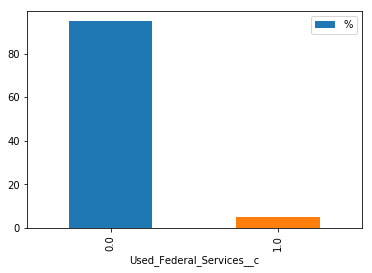

,Used_Federal_Services__c,count,%
0,0.0,17301,94.93525
1,1.0,923,5.06475


In [49]:
summary(not_confirmed_hire,'Used_Federal_Services__c')

# Interview_Skills__c

#  Confirmed Hire

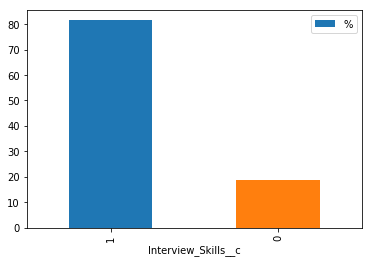

,Interview_Skills__c,count,%
1,1,19164,81.4692
0,0,4359,18.5308


In [50]:
summary(confirmed_hire,'Interview_Skills__c')

#  Not Confirmed Hire

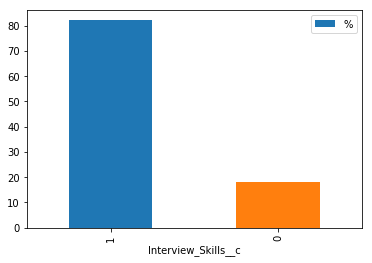

,Interview_Skills__c,count,%
1,1,14949,82.029192
0,0,3275,17.970808


In [51]:
summary(not_confirmed_hire,'Interview_Skills__c')

# Created_LinkedIn_account__c

# Confirmed Hire

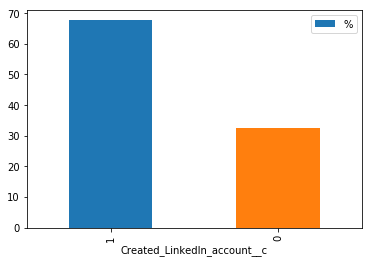

,Created_LinkedIn_account__c,count,%
1,1,15889,67.546656
0,0,7634,32.453344


In [52]:
summary(confirmed_hire,'Created_LinkedIn_account__c')

#  Not Confirmed Hire

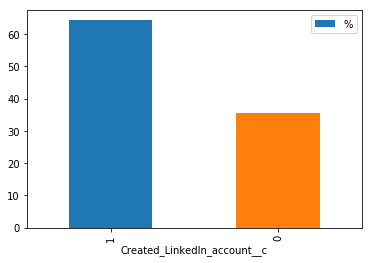

,Created_LinkedIn_account__c,count,%
1,1,11717,64.294337
0,0,6507,35.705663


In [54]:
summary(not_confirmed_hire,'Created_LinkedIn_account__c')


# Value_Proposition__c

# Confirmed Hire

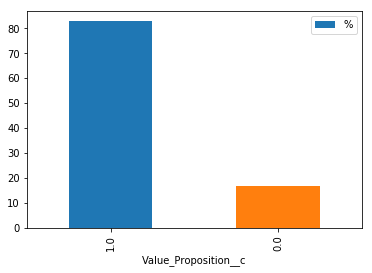

,Value_Proposition__c,count,%
1,1.0,19531,83.029376
0,0.0,3992,16.970624


In [55]:
summary(confirmed_hire,'Value_Proposition__c')

# Not Confirmed Hire

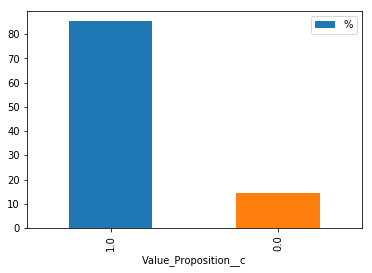

,Value_Proposition__c,count,%
1,1.0,15581,85.497147
0,0.0,2643,14.502853


In [56]:
summary(not_confirmed_hire,'Value_Proposition__c')


# Hired_with_EO_assistance__c

# Confirmed Hire

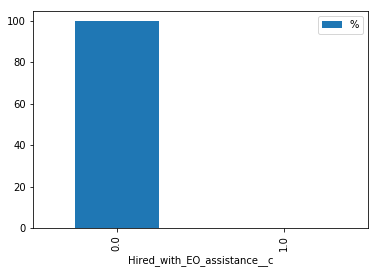

,Hired_with_EO_assistance__c,count,%
0,0.0,23498,99.893721
1,1.0,25,0.106279


In [57]:
summary(confirmed_hire,'Hired_with_EO_assistance__c')

# Not Confirmed Hire

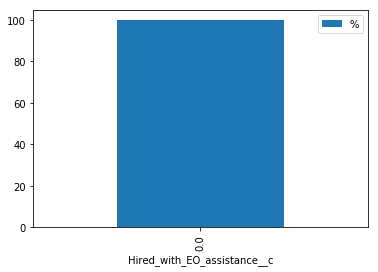

,Hired_with_EO_assistance__c,count,%
0,0.0,18224,100.0


In [58]:
summary(not_confirmed_hire,'Hired_with_EO_assistance__c')


# Updated_Resume_Complete__c

# Confirmed Hire

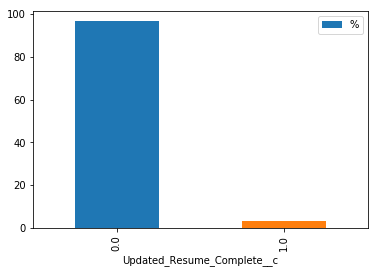

,Updated_Resume_Complete__c,count,%
0,0.0,22764,96.773371
1,1.0,759,3.226629


In [59]:
summary(confirmed_hire,'Updated_Resume_Complete__c')

# Not Confirmed Hire

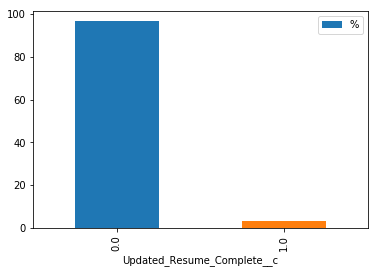

,Updated_Resume_Complete__c,count,%
0,0.0,17630,96.740562
1,1.0,594,3.259438


In [61]:
summary(not_confirmed_hire,'Updated_Resume_Complete__c')


In [ ]:
HHUSA_Workshop_Participant__c

# Confirmed Hire

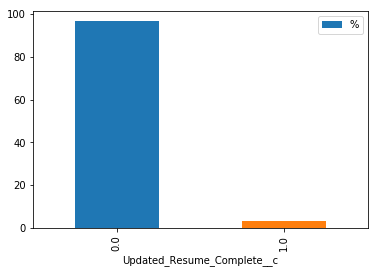

,Updated_Resume_Complete__c,count,%
0,0.0,22764,96.773371
1,1.0,759,3.226629


In [62]:
summary(confirmed_hire,'Updated_Resume_Complete__c')

# Not Confirmed Hire

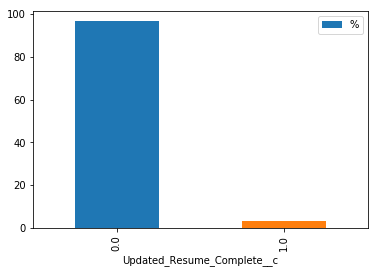

,Updated_Resume_Complete__c,count,%
0,0.0,17630,96.740562
1,1.0,594,3.259438


In [63]:
summary(not_confirmed_hire,'Updated_Resume_Complete__c')

# O2O_Initial_Assessment_Complete__c

# Confirmed Hire

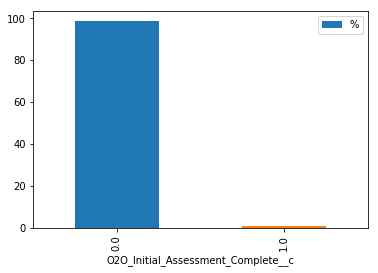

,O2O_Initial_Assessment_Complete__c,count,%
0,0.0,23241,98.801173
1,1.0,282,1.198827


In [64]:
summary(confirmed_hire,'O2O_Initial_Assessment_Complete__c')

# Not Confirmed Hire

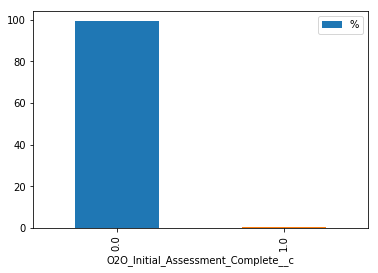

,O2O_Initial_Assessment_Complete__c,count,%
0,0.0,18127,99.467735
1,1.0,97,0.532265


In [65]:
summary(not_confirmed_hire,'O2O_Initial_Assessment_Complete__c')

# Is_the_Initial_Intake_Assessment_done__c

# Confirmed Hire

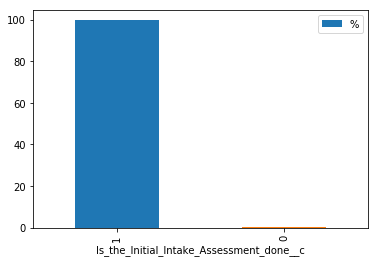

,Is_the_Initial_Intake_Assessment_done__c,count,%
1,1,23452,99.698168
0,0,71,0.301832


In [66]:
summary(confirmed_hire,'Is_the_Initial_Intake_Assessment_done__c')

# Not Confirmed Hire

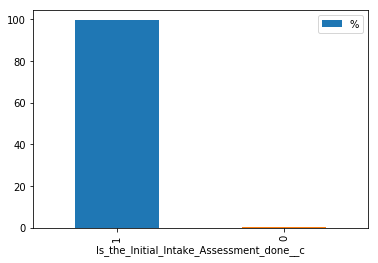

,Is_the_Initial_Intake_Assessment_done__c,count,%
1,1,18138,99.528095
0,0,86,0.471905


In [67]:
summary(not_confirmed_hire,'Is_the_Initial_Intake_Assessment_done__c')

# Permission_to_use_job_board_granted__c

# Confirmed Hire

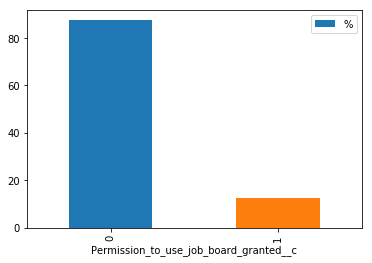

,Permission_to_use_job_board_granted__c,count,%
0,0,20575,87.467585
1,1,2948,12.532415


In [68]:
summary(confirmed_hire,'Permission_to_use_job_board_granted__c')

# Not Confirmed Hire

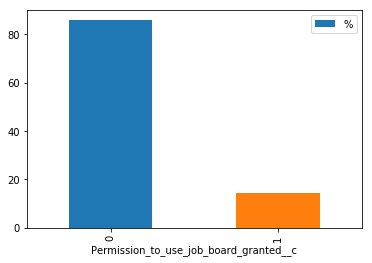

,Permission_to_use_job_board_granted__c,count,%
0,0,15631,85.77151
1,1,2593,14.22849


In [69]:
summary(not_confirmed_hire,'Permission_to_use_job_board_granted__c')

In [ ]:
Finalized_HHUSA_revised_resume_on_file__c

# Confirmed Hire

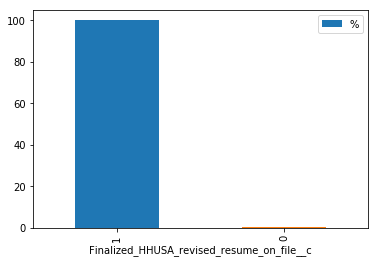

,Finalized_HHUSA_revised_resume_on_file__c,count,%
1,1,23509,99.940484
0,0,14,0.059516


In [70]:
summary(confirmed_hire,'Finalized_HHUSA_revised_resume_on_file__c')

# Not Confirmed Hire

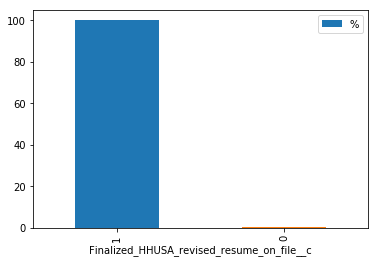

,Finalized_HHUSA_revised_resume_on_file__c,count,%
1,1,18203,99.884767
0,0,21,0.115233


In [71]:
summary(not_confirmed_hire,'Finalized_HHUSA_revised_resume_on_file__c')

# Resume_Tailoring_Tips__c

# Confirmed Hire

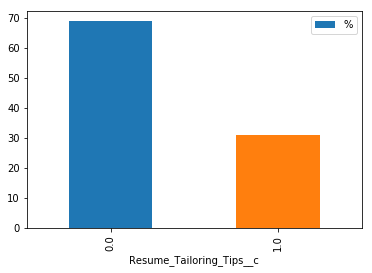

,Resume_Tailoring_Tips__c,count,%
0,0.0,16222,68.962292
1,1.0,7301,31.037708


In [73]:
summary(confirmed_hire,'Resume_Tailoring_Tips__c')

# Not Confirmed Hire

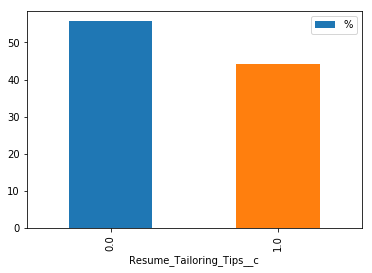

,Resume_Tailoring_Tips__c,count,%
0,0.0,10170,55.805531
1,1.0,8054,44.194469


In [74]:
summary(not_confirmed_hire,'Resume_Tailoring_Tips__c')

# to check if the person conducting assesment influences the hiring chances

In [79]:
def count_unique_null(contact_dataset,feature):
    print("Unique Values:", contact_dataset[feature].nunique())
    print("Null Values:", contact_dataset[feature].isna().sum())
    print("Null Values %:", contact_dataset[feature].isna().sum()/len(contact_dataset.index)*100)
def count_table(contact_dataset,feature):
    contact_dataset_by_feature = contact_dataset.groupby(feature)
    countTable = contact_dataset_by_feature[feature].agg(['count'])
    total_feature = countTable.values.sum()
    proportion = np.divide(countTable['count'], total_feature/100)
    countTable['%'] = proportion
    countTable = countTable.reset_index()
    return countTable.nlargest(25, 'count')
def summary(contact_dataset,feature):
    count_unique_null(contact_dataset,feature)
    plot = count_table(contact_dataset,feature).plot(x = feature, y = '%', kind = 'bar')
    plt.show()
    return count_table(contact_dataset,feature)

In [77]:
    contact=pd.read_csv('SalesForce_Contact.csv', encoding='latin', low_memory=False)

Unique Values: 171
Null Values: 79170
Null Values %: 59.775755974177954


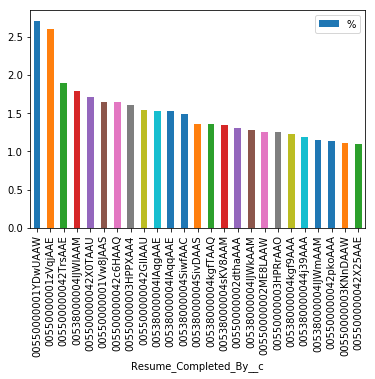

,Resume_Completed_By__c,count,%
103,00550000001YDwUAAW,1444,2.710465
106,00550000001zVqjAAE,1389,2.607227
148,005500000042TrsAAE,1013,1.901455
32,00538000004lJWlAAM,955,1.792586
151,005500000042X0TAAU,914,1.715626
98,00550000001Vw8JAAS,880,1.651807
155,005500000042c6HAAQ,875,1.642421
128,00550000003HPPXAA4,858,1.610511
145,005500000042GlIAAU,820,1.539183
29,00538000004lAqgAAE,814,1.527921


In [80]:
summary(contact,'Resume_Completed_By__c')

In [82]:
Contact_confirmed_hire=contact.loc[contact["Hire_Heroes_USA_Confirmed_Hire__c"]==1]

In [83]:
Result_without_Filtering=(Contact_confirmed_hire.reset_index()
          .groupby(['Resume_Completed_By__c'])['Resume_Completed_By__c']
          .count().rename(columns={'count':'Count'})
       )

In [85]:
Result_without_Filtering=Result_without_Filtering.to_frame().reset_index()

In [86]:
names=['Resume_Completed_By__c', 'Total_Count']

In [87]:
Result_without_Filtering.columns = names

In [88]:
Result_without_Filtering

,Resume_Completed_By__c,Total_Count
0,0050z000006tEPEAA2,16
1,0050z0000078xG2AAI,7
2,0050z0000078xGMAAY,6
3,0050z00000796uVAAQ,2
4,0050z00000796uaAAA,5
5,0050z00000796vTAAQ,8
6,0050z00000796vdAAA,2
7,0050z0000079ElWAAU,1
8,0050z0000079ElgAAE,1
9,0050z0000079ElvAAE,3


In [89]:
Resume_evaluation=Contact_confirmed_hire.loc[Contact_confirmed_hire["Revised_Resume_Used_to_Apply_for_Job__c"]=="Yes"]

In [90]:
result = (Resume_evaluation.reset_index()
          .groupby(['Resume_Completed_By__c'])['Resume_Completed_By__c']
          .count().rename(columns={'count':'Count'})
       )

In [91]:
names=['Resume_Completed_By__c', 'Total_Count']

In [92]:
result=result.to_frame().reset_index()

In [93]:
names=['Resume_Completed_By__c', 'Count']

In [94]:
result.columns = names

In [95]:
result.head(3)

,Resume_Completed_By__c,Count
0,00538000003nrcXAAQ,2
1,005380000044j39AAA,297
2,00538000004SivDAAS,340


In [96]:
final_dataset = pd.merge(Result_without_Filtering, result, left_on='Resume_Completed_By__c', right_on='Resume_Completed_By__c')

In [97]:
final_dataset.head(3)

,Resume_Completed_By__c,Total_Count,Count
0,00538000003nrcXAAQ,2,2
1,005380000044j39AAA,382,297
2,00538000004SivDAAS,443,340


In [98]:
final_dataset['Yes_percentage']=(final_dataset['Count']/final_dataset['Total_Count'])*100

In [99]:
final_dataset.head(3)

,Resume_Completed_By__c,Total_Count,Count,Yes_percentage
0,00538000003nrcXAAQ,2,2,100.000000
1,005380000044j39AAA,382,297,77.748691
2,00538000004SivDAAS,443,340,76.749436
